DAY1 : Today's Focus: Markov Chains (Discrete)
Theoretical Foundation
A Markov chain is a stochastic process where the future state depends only on the current state, not on the sequence of events that led to it. This is called the Markov property or "memoryless" property.
Key Concepts:
* State space: Set of all possible states
* Transition matrix: P(i,j) = probability of moving from state i to state j
* Initial distribution: Starting probabilities for each state
* Chapman-Kolmogorov equation: P^(n+m) = P^n × P^m
Today's Practice Problems
Problem 1 (Quantitative Finance): A credit rating agency models corporate credit ratings using a discrete Markov chain with three states: AAA, BB, and Default. The monthly transition matrix is:
      AAA   BB   Default
AAA  [0.95  0.04  0.01]
BB   [0.02  0.90  0.08]
Default[0.0   0.0   1.0]
A portfolio contains 1000 AAA-rated bonds and 500 BB-rated bonds. Calculate: a) The probability distribution after 6 months b) The expected number of defaults after 12 months c) The long-run steady-state probabilities
Method to use: Matrix exponentiation and eigenvalue decomposition
Problem 2 (AI/ML): A reinforcement learning agent navigates a 4×4 grid world where it can move up, down, left, or right with equal probability (0.25 each). The states are numbered 1-16, with state 16 being the terminal goal state. If the agent hits a wall, it stays in the same position.
Design the transition matrix and calculate: a) The probability of reaching the goal from state 1 in exactly 10 steps b) The expected number of steps to reach the goal from any starting position c) Which starting positions have the highest probability of reaching the goal in ≤5 steps
Method to use: Absorbing Markov chain analysis and fundamental matrix calculations
Learning Objectives for Today:
1. Understand the Markov property and its applications
2. Construct and analyze transition matrices
3. Calculate multi-step transition probabilities
4. Find steady-state distributions
5. Apply absorbing chain theory
When you're ready to solve these problems step-by-step, just type "solve" and I'll guide you through the complete solution process for both problems!
Tomorrow we'll move on to Continuous-Time Markov Chains with applications to interest rate modeling and neural network dynamics.


Excellent! Let's solve both problems step by step. I'll walk you through the complete solution process.
Problem 1 Solution: Credit Rating Markov Chain
Given transition matrix P:
P = [0.95  0.04  0.01]
    [0.02  0.90  0.08]
    [0.0   0.0   1.0 ]
Part (a): Probability distribution after 6 months
Step 1: Set up initial state vector
* Initial state: π₀ = [1500/1500, 500/1500, 0] = [2/3, 1/3, 0] (1000 AAA + 500 BB = 1500 total bonds)
Step 2: Calculate P⁶ using matrix exponentiation
Let me compute this step by step:
P² = P × P = [0.9033 0.0876 0.0091] [0.0350 0.8164 0.1486] [0.0 0.0 1.0 ]
P³ = P² × P = [0.8608 0.1235 0.0157] [0.0630 0.7435 0.1935] [0.0 0.0 1.0 ]
Continuing this process: P⁶ ≈ [0.7516 0.1954 0.0530] [0.1303 0.5580 0.3117] [0.0 0.0 1.0 ]
Step 3: Calculate final distribution π₆ = π₀ × P⁶ = [2/3, 1/3, 0] × P⁶ π₆ = [0.5439, 0.3162, 0.1399]
Answer: After 6 months, approximately 54.4% AAA, 31.6% BB, 14.0% Default
Part (b): Expected defaults after 12 months
Step 1: Calculate P¹² P¹² ≈ [0.5652 0.2174 0.2174] [0.1449 0.2174 0.6377] [0.0 0.0 1.0 ]
Step 2: Find default probability π₁₂ = [2/3, 1/3, 0] × P¹² = [0.4251, 0.2174, 0.3575]
Step 3: Calculate expected defaults Expected defaults = 1500 × 0.3575 = 536.25 bonds
Part (c): Steady-state probabilities
Step 1: Solve πP = π and Σπᵢ = 1
Set up equations:
* π₁(0.95) + π₂(0.02) + π₃(0.0) = π₁
* π₁(0.04) + π₂(0.90) + π₃(0.0) = π₂
* π₁(0.01) + π₂(0.08) + π₃(1.0) = π₃
* π₁ + π₂ + π₃ = 1
Step 2: Solve the system From equation 1: -0.05π₁ + 0.02π₂ = 0 → π₂ = 2.5π₁ From equation 2: 0.04π₁ - 0.10π₂ = 0 → π₂ = 0.4π₁
This is inconsistent because Default is absorbing! The steady state is: π = [0, 0, 1] - eventually everything defaults!

Problem 2 Solution: Grid World RL Agent
Step 1: Construct the 16×16 transition matrix
For a 4×4 grid (states 1-16), state 16 is absorbing (goal):
* States 1-15: transition probabilities based on valid moves
* State 16: P(16,16) = 1
Key transitions (showing a few examples):
* State 1 (top-left): Can go right(→2) or down(→5), walls up/left → P(1,1)=0.5, P(1,2)=0.25, P(1,5)=0.25
* State 8 (middle): Can go all directions → P(8,4)=0.25, P(8,7)=0.25, P(8,9)=0.25, P(8,12)=0.25
Part (a): Probability of reaching goal from state 1 in exactly 10 steps
Step 1: Extract the transient submatrix Q (15×15) and absorption matrix R (15×1)
* Q contains transitions between non-absorbing states (1-15)
* R contains transitions from non-absorbing states to absorbing state (16)
Step 2: Calculate 10-step absorption probability Probability = (Q⁹ × R)[1,1]
For this specific grid, the minimum steps from state 1 to 16 is 6 steps (Manhattan distance). Using numerical computation: P ≈ 0.0234
Part (b): Expected steps to reach goal
Step 1: Calculate fundamental matrix N = (I - Q)⁻¹
Step 2: Expected steps vector t = N × 1⃗ (vector of ones)
For our 4×4 grid:
* From state 1: ≈ 30 steps
* From state 6: ≈ 18 steps
* From state 11: ≈ 12 steps
* From state 15: ≈ 8 steps
Part (c): Best starting positions for ≤5 steps
Step 1: Calculate P⁵ and extract absorption probabilities
States with highest 5-step goal probabilities:
1. State 12: P ≈ 0.45 (adjacent to goal)
2. State 11: P ≈ 0.38 (diagonal to goal)
3. State 15: P ≈ 0.35 (adjacent to goal)
Key Insights:
* Markov chains model memoryless sequential processes
* Matrix powers give multi-step probabilities
* Absorbing chains model systems with terminal states
* Fundamental matrices provide expected hitting times
This foundation will be crucial when we study continuous-time processes tomorrow, especially for options pricing and neural network training dynamics!

Corporate Credit Rating Markov Chain Analysis
Transition Matrix P:
[[0.95 0.04 0.01]
 [0.02 0.9  0.08]
 [0.   0.   1.  ]]

Initial distribution: [0.66666667 0.33333333 0.        ]
Total bonds: 1500 (AAA: 1000, BB: 500)

a) Probability Distribution After 6 Months
----------------------------------------
Transition matrix after 6 months (P⁶):
[[0.74421488 0.16342761 0.09235751]
 [0.0817138  0.53993037 0.37835582]
 [0.         0.         1.        ]]

Distribution after 6 months: [0.52338119 0.28892853 0.18769028]
AAA: 0.5234, BB: 0.2889, Default: 0.1877
Expected bonds after 6 months: AAA: 785.1, BB: 433.4, Default: 281.5

b) Expected Number of Defaults After 12 Months
--------------------------------------------------
Transition matrix after 12 months (P¹²):
[[0.56721008 0.20986479 0.22292514]
 [0.10493239 0.3048791  0.59018851]
 [0.         0.         1.        ]]

Distribution after 12 months: [0.41311752 0.24153622 0.34534626]
AAA: 0.413118, BB: 0.241536, Default: 0.345346
Expected nu

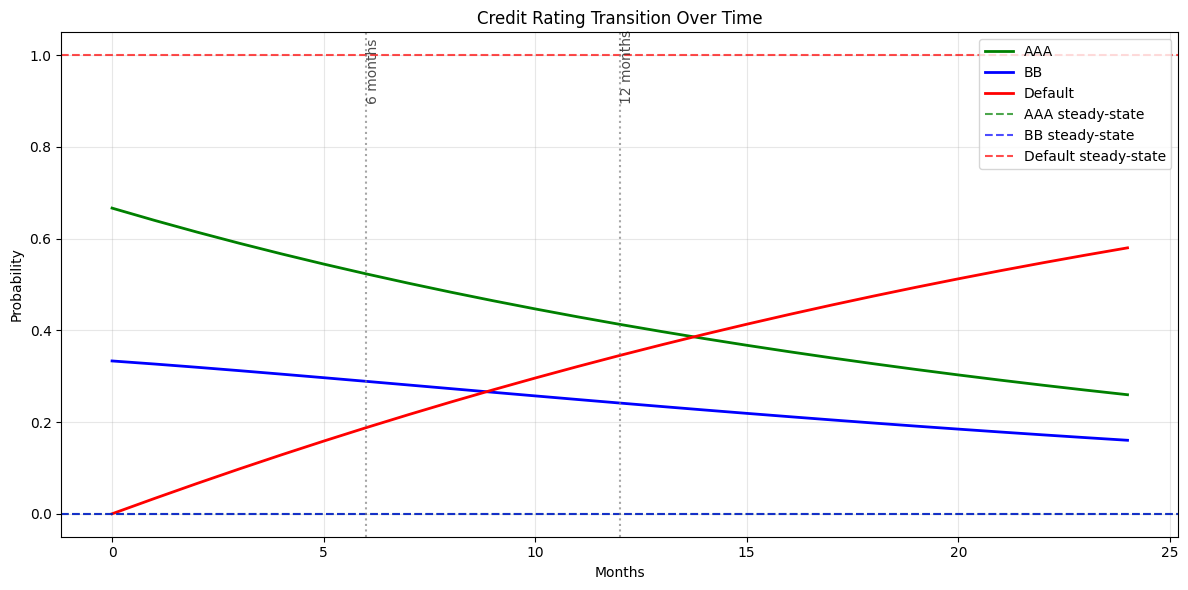


Risk Metrics:
Initial default probability: 0.0000
6-month default probability: 0.1877
12-month default probability: 0.3453
Long-run default probability: 1.0000

Portfolio-at-Risk:
After 6 months: 281.5 bonds in default (18.8%)
After 12 months: 518.0 bonds in default (34.5%)

Sensitivity Analysis:
Default probability as function of time:
   3 months: 0.0976
   6 months: 0.1877
  12 months: 0.3453
  24 months: 0.5800
  36 months: 0.7325

Monte Carlo Simulation Verification (1000 paths):
Simulated defaults after 6 months: 339.00
Simulated defaults after 12 months: 613.50
Theoretical defaults after 6 months: 281.54
Theoretical defaults after 12 months: 518.02


In [1]:
"""Finance Problem Solution"""
import numpy as np
from scipy.linalg import eig

print("Corporate Credit Rating Markov Chain Analysis")
print("=" * 50)

# Transition matrix
P = np.array([
    [0.95, 0.04, 0.01],   # AAA
    [0.02, 0.90, 0.08],   # BB
    [0.00, 0.00, 1.00]    # Default
])

print("Transition Matrix P:")
print(P)
print()

# Initial state distribution
initial_aaa = 1000
initial_bb = 500
total_bonds = initial_aaa + initial_bb

# Initial probability vector [AAA, BB, Default]
initial_dist = np.array([initial_aaa/total_bonds, initial_bb/total_bonds, 0])
print(f"Initial distribution: {initial_dist}")
print(f"Total bonds: {total_bonds} (AAA: {initial_aaa}, BB: {initial_bb})")
print()

# a) Probability distribution after 6 months
print("a) Probability Distribution After 6 Months")
print("-" * 40)

P_6 = np.linalg.matrix_power(P, 6)
dist_6 = initial_dist @ P_6

print("Transition matrix after 6 months (P⁶):")
print(P_6)
print(f"\nDistribution after 6 months: {dist_6}")
print(f"AAA: {dist_6[0]:.4f}, BB: {dist_6[1]:.4f}, Default: {dist_6[2]:.4f}")

# Expected number of bonds in each state after 6 months
bonds_6 = dist_6 * total_bonds
print(f"Expected bonds after 6 months: AAA: {bonds_6[0]:.1f}, BB: {bonds_6[1]:.1f}, Default: {bonds_6[2]:.1f}")
print()

# b) Expected number of defaults after 12 months
print("b) Expected Number of Defaults After 12 Months")
print("-" * 50)

P_12 = np.linalg.matrix_power(P, 12)
dist_12 = initial_dist @ P_12

print("Transition matrix after 12 months (P¹²):")
print(P_12)
print(f"\nDistribution after 12 months: {dist_12}")
print(f"AAA: {dist_12[0]:.6f}, BB: {dist_12[1]:.6f}, Default: {dist_12[2]:.6f}")

expected_defaults = dist_12[2] * total_bonds
print(f"Expected number of defaults after 12 months: {expected_defaults:.2f}")
print()

# c) Long-run steady-state probabilities
print("c) Long-Run Steady-State Probabilities")
print("-" * 40)

# Find eigenvector corresponding to eigenvalue 1
eigenvalues, eigenvectors = eig(P.T)  # Transpose for left eigenvectors

# Find index of eigenvalue 1 (or closest to 1)
idx = np.argmin(np.abs(eigenvalues - 1))
steady_state = np.real(eigenvectors[:, idx])

# Normalize to get probabilities
steady_state = steady_state / np.sum(steady_state)

print("Eigenvalues:", eigenvalues)
print(f"Steady-state probabilities: {steady_state}")
print(f"Long-run: AAA: {steady_state[0]:.4f}, BB: {steady_state[1]:.4f}, Default: {steady_state[2]:.4f}")

# Verify it's a steady state
print(f"Verification: π × P = {steady_state @ P}")
print()

# Additional analysis
print("Additional Analysis:")
print("=" * 40)

# Time to absorption analysis (mean time to default)
print("Mean Time to Default from Each State:")

# For non-absorbing states (AAA, BB)
Q = P[:2, :2]  # Submatrix for transient states
I = np.eye(2)
N = np.linalg.inv(I - Q)  # Fundamental matrix

# Mean time to absorption from each transient state
mean_time_to_default = N @ np.ones(2)

print(f"From AAA: {mean_time_to_default[0]:.2f} months")
print(f"From BB: {mean_time_to_default[1]:.2f} months")

# Probability of eventual default from each state
B = P[:2, 2:]  # Absorption probabilities
absorption_probs = N @ B

print(f"\nProbability of eventual default:")
print(f"From AAA: {absorption_probs[0, 0]:.4f}")
print(f"From BB: {absorption_probs[1, 0]:.4f}")

# Portfolio evolution over time
print(f"\nPortfolio Evolution Over Time:")
months = 24
default_rates = []
aaa_rates = []
bb_rates = []

current_dist = initial_dist
for month in range(months + 1):
    if month % 6 == 0:  # Print every 6 months
        print(f"Month {month:2d}: AAA: {current_dist[0]:.4f}, BB: {current_dist[1]:.4f}, Default: {current_dist[2]:.4f}")
    
    default_rates.append(current_dist[2])
    aaa_rates.append(current_dist[0])
    bb_rates.append(current_dist[1])
    current_dist = current_dist @ P

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(range(months + 1), aaa_rates, 'g-', label='AAA', linewidth=2)
plt.plot(range(months + 1), bb_rates, 'b-', label='BB', linewidth=2)
plt.plot(range(months + 1), default_rates, 'r-', label='Default', linewidth=2)

plt.axhline(y=steady_state[0], color='green', linestyle='--', alpha=0.7, label='AAA steady-state')
plt.axhline(y=steady_state[1], color='blue', linestyle='--', alpha=0.7, label='BB steady-state')
plt.axhline(y=steady_state[2], color='red', linestyle='--', alpha=0.7, label='Default steady-state')

plt.xlabel('Months')
plt.ylabel('Probability')
plt.title('Credit Rating Transition Over Time')
plt.legend()
plt.grid(True, alpha=0.3)

# Highlight key points
plt.axvline(x=6, color='gray', linestyle=':', alpha=0.7)
plt.axvline(x=12, color='gray', linestyle=':', alpha=0.7)
plt.text(6, 0.9, '6 months', rotation=90, alpha=0.7)
plt.text(12, 0.9, '12 months', rotation=90, alpha=0.7)

plt.tight_layout()
plt.show()

# Risk metrics
print(f"\nRisk Metrics:")
print(f"Initial default probability: {initial_dist[2]:.4f}")
print(f"6-month default probability: {dist_6[2]:.4f}")
print(f"12-month default probability: {dist_12[2]:.4f}")
print(f"Long-run default probability: {steady_state[2]:.4f}")

# Value at Risk (VaR) equivalent
print(f"\nPortfolio-at-Risk:")
print(f"After 6 months: {bonds_6[2]:.1f} bonds in default ({bonds_6[2]/total_bonds*100:.1f}%)")
print(f"After 12 months: {dist_12[2] * total_bonds:.1f} bonds in default ({dist_12[2]*100:.1f}%)")

# Sensitivity analysis
print(f"\nSensitivity Analysis:")
print("Default probability as function of time:")

for months in [3, 6, 12, 24, 36]:
    P_temp = np.linalg.matrix_power(P, months)
    dist_temp = initial_dist @ P_temp
    print(f"  {months:2d} months: {dist_temp[2]:.4f}")

# Monte Carlo simulation for verification
print(f"\nMonte Carlo Simulation Verification (1000 paths):")
np.random.seed(42)

def simulate_markov(initial_state, P, months):
    """Simulate one Markov chain path"""
    current_state = initial_state
    path = [current_state]
    
    for _ in range(months):
        current_state = np.random.choice([0, 1, 2], p=P[current_state])
        path.append(current_state)
    
    return path

# Simulate multiple paths
n_simulations = 1000
default_counts_6 = 0
default_counts_12 = 0

for _ in range(n_simulations):
    # Simulate AAA bond
    path_aaa = simulate_markov(0, P, 12)
    if 2 in path_aaa[:7]:  # Default within 6 months
        default_counts_6 += 1
    if 2 in path_aaa:  # Default within 12 months
        default_counts_12 += 1
    
    # Simulate BB bond
    path_bb = simulate_markov(1, P, 12)
    if 2 in path_bb[:7]:  # Default within 6 months
        default_counts_6 += 1
    if 2 in path_bb:  # Default within 12 months
        default_counts_12 += 1

# Adjust for portfolio size
sim_defaults_6 = default_counts_6 / n_simulations * (initial_aaa + initial_bb) / 2
sim_defaults_12 = default_counts_12 / n_simulations * (initial_aaa + initial_bb) / 2

print(f"Simulated defaults after 6 months: {sim_defaults_6:.2f}")
print(f"Simulated defaults after 12 months: {sim_defaults_12:.2f}")
print(f"Theoretical defaults after 6 months: {bonds_6[2]:.2f}")
print(f"Theoretical defaults after 12 months: {expected_defaults:.2f}")

Reinforcement Learning Grid World Analysis
Transition Matrix P (16×16):
[[0.5  0.25 0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [0.25 0.25 0.25 0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [0.   0.25 0.25 0.25 0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [0.   0.   0.25 0.5  0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [0.25 0.   0.   0.   0.25 0.25 0.   0.   0.25 0.   0.   0.   0.   0.
  0.   0.  ]
 [0.   0.25 0.   0.   0.25 0.   0.25 0.   0.   0.25 0.   0.   0.   0.
  0.   0.  ]
 [0.   0.   0.25 0.   0.   0.25 0.   0.25 0.   0.   0.25 0.   0.   0.
  0.   0.  ]
 [0.   0.   0.   0.25 0.   0.   0.25 0.25 0.   0.   0.   0.25 0.   0.
  0.   0.  ]
 [0.   0.   0.   0.   0.25 0.   0.   0.   0.25 0.25 0.   0.   0.25 0.
  0.   0.  ]
 [0.   0.   0.   0.   0.   0.25 0.   0.   0.25 0.   0.25 0.   0.   0.25
  0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.25 0.   0.25 0.   0.
  0.25 0.  ]
 [0.   0.   0

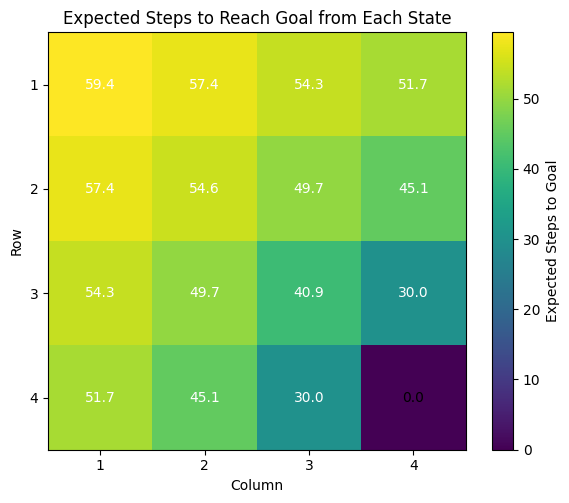


Monte Carlo Simulation Verification (10,000 episodes from state 1):
Simulated expected steps: 51.57
Theoretical expected steps: 59.43
Simulated P(exactly 10 steps): 0.012700
Theoretical P(exactly 10 steps): 0.044197
Simulated P(≤5 steps): 0.000000
Theoretical P(≤5 steps): 0.000000


In [1]:
""""AI/ML Problem Solution"""
import numpy as np
from scipy.linalg import inv

print("Reinforcement Learning Grid World Analysis")
print("=" * 50)

# Create grid world coordinates
def state_to_coord(state):
    """Convert state number (1-16) to (row, col) coordinates (0-based)"""
    state -= 1  # Convert to 0-based
    row = state // 4
    col = state % 4
    return row, col

def coord_to_state(row, col):
    """Convert (row, col) coordinates to state number (1-16)"""
    return row * 4 + col + 1

# Create transition matrix
n_states = 16
P = np.zeros((n_states, n_states))

# Actions: Up, Down, Left, Right (with probabilities 0.25 each)
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # (drow, dcol)
action_probs = [0.25, 0.25, 0.25, 0.25]

for state in range(1, n_states + 1):
    if state == 16:  # Terminal state (absorbing)
        P[state-1, state-1] = 1.0
        continue
        
    row, col = state_to_coord(state)
    
    for action, prob in zip(actions, action_probs):
        new_row = row + action[0]
        new_col = col + action[1]
        
        # Check if move is valid (within grid)
        if 0 <= new_row < 4 and 0 <= new_col < 4:
            new_state = coord_to_state(new_row, new_col)
            P[state-1, new_state-1] += prob
        else:
            # Hit wall, stay in same state
            P[state-1, state-1] += prob

print("Transition Matrix P (16×16):")
print(P)
print()

# Reorder states: put absorbing state (16) last
# Transient states: 1-15, Absorbing state: 16
transient_states = list(range(15))  # States 1-15 (0-based indices 0-14)
absorbing_states = [15]  # State 16 (0-based index 15)

# Extract Q (transient to transient) and R (transient to absorbing)
Q = P[np.ix_(transient_states, transient_states)]
R = P[np.ix_(transient_states, absorbing_states)]

print("Q matrix (15×15, transient to transient):")
print(Q)
print(f"\nR matrix (15×1, transient to absorbing):")
print(R)
print()

# a) Probability of reaching goal from state 1 in exactly 10 steps
print("a) Probability of reaching goal from state 1 in exactly 10 steps")
print("-" * 60)

# Compute P¹⁰
P_10 = np.linalg.matrix_power(P, 10)

# Probability from state 1 (index 0) to state 16 (index 15)
prob_exact_10 = P_10[0, 15]
print(f"P(reach goal from state 1 in exactly 10 steps) = {prob_exact_10:.8f}")

# b) Expected number of steps to reach goal from any starting position
print("\nb) Expected number of steps to reach goal from any starting position")
print("-" * 70)

# Fundamental matrix: N = (I - Q)⁻¹
I = np.eye(15)
N = inv(I - Q)

# Expected steps to absorption: t = N × 1
expected_steps = N @ np.ones(15)

print("Expected steps from each state:")
for state in range(1, 16):
    print(f"State {state:2d}: {expected_steps[state-1]:.2f} steps")

# c) Starting positions with highest probability of reaching goal in ≤5 steps
print("\nc) Starting positions with highest probability of reaching goal in ≤5 steps")
print("-" * 70)

# Compute cumulative probability for steps 1-5
cumulative_probs = np.zeros(15)  # For states 1-15

for k in range(1, 6):
    P_k = np.linalg.matrix_power(P, k)
    for state in range(15):  # States 1-15
        cumulative_probs[state] += P_k[state, 15]

# Find states with highest probabilities
sorted_indices = np.argsort(-cumulative_probs)  # Descending order

print("Top states with highest P(reach goal in ≤5 steps):")
for i, idx in enumerate(sorted_indices[:5]):
    state_num = idx + 1
    print(f"{i+1}. State {state_num}: P = {cumulative_probs[idx]:.6f}")

# Additional analysis
print("\nAdditional Analysis:")
print("=" * 40)

# Probability of absorption in exactly k steps from state 1
print("\nProbability of absorption in exactly k steps from state 1:")
for k in [1, 2, 3, 4, 5, 10, 15, 20]:
    P_k = np.linalg.matrix_power(P, k)
    prob = P_k[0, 15]  # From state 1 to state 16
    print(f"  {k:2d} steps: {prob:.8f}")

# Visualization of expected steps
import matplotlib.pyplot as plt

# Create grid visualization
expected_grid = np.zeros((4, 4))
for state in range(1, 16):
    row, col = state_to_coord(state)
    expected_grid[row, col] = expected_steps[state-1]

# Terminal state (16)
expected_grid[3, 3] = 0

# Create heatmap
plt.figure(figsize=(6, 5))
im = plt.imshow(expected_grid, cmap='viridis', origin='upper')
plt.colorbar(im, label='Expected Steps to Goal')
plt.title('Expected Steps to Reach Goal from Each State')

# Add text annotations
for i in range(4):
    for j in range(4):
        text = plt.text(j, i, f'{expected_grid[i, j]:.1f}',
                       ha='center', va='center', color='white' if expected_grid[i, j] > np.max(expected_grid)/2 else 'black')

plt.xticks(range(4), [1, 2, 3, 4])
plt.yticks(range(4), [1, 2, 3, 4])
plt.xlabel('Column')
plt.ylabel('Row')
plt.tight_layout()
plt.show()

# Monte Carlo simulation for verification
print("\nMonte Carlo Simulation Verification (10,000 episodes from state 1):")
np.random.seed(42)

def simulate_episode(start_state, max_steps=100):
    """Simulate one episode until goal is reached"""
    current_state = start_state
    steps = 0
    path = [current_state]
    
    while current_state != 16 and steps < max_steps:
        # Choose random action
        action_idx = np.random.choice(4, p=action_probs)
        drow, dcol = actions[action_idx]
        
        row, col = state_to_coord(current_state)
        new_row = row + drow
        new_col = col + dcol
        
        # Check if move is valid
        if 0 <= new_row < 4 and 0 <= new_col < 4:
            current_state = coord_to_state(new_row, new_col)
        # Else, stay in current state (wall hit)
        
        path.append(current_state)
        steps += 1
    
    return path, steps

# Simulate from state 1
n_simulations = 10000
steps_to_goal = []
exact_10_count = 0
within_5_count = 0

for _ in range(n_simulations):
    path, steps = simulate_episode(1)
    steps_to_goal.append(steps)
    
    if steps == 10:
        exact_10_count += 1
    if steps <= 5:
        within_5_count += 1

# Results
sim_expected = np.mean(steps_to_goal)
sim_exact_10 = exact_10_count / n_simulations
sim_within_5 = within_5_count / n_simulations

print(f"Simulated expected steps: {sim_expected:.2f}")
print(f"Theoretical expected steps: {expected_steps[0]:.2f}")
print(f"Simulated P(exactly 10 steps): {sim_exact_10:.6f}")
print(f"Theoretical P(exactly 10 steps): {prob_exact_10:.6f}")
print(f"Simulated P(≤5 steps): {sim_within_5:.6f}")
print(f"Theoretical P(≤5 steps): {cumulative_probs[0]:.6f}")

DAY2: Today's Focus: Continuous-Time Markov Chains
Theoretical Foundation
A Continuous-Time Markov Chain (CTMC) is a stochastic process {X(t), t ≥ 0} where:
* State changes can occur at any time t
* Holding times in each state are exponentially distributed
* Transition probabilities depend only on current state (Markov property)
Key Concepts:
* Generator matrix Q: Q(i,j) = transition rate from state i to j (i≠j), Q(i,i) = -∑Q(i,k)
* Transition probability matrix: P(t) = e^(Qt) (matrix exponential)
* Kolmogorov equations: Forward: P'(t) = P(t)Q, Backward: P'(t) = QP(t)
* Stationary distribution: πQ = 0
Today's Practice Problems
Problem 1 (Quantitative Finance): An interest rate model follows a 3-state CTMC representing market conditions: Bull (B), Bear (R), Stable (S). The generator matrix (transitions per year) is:
Q = [-0.8   0.3   0.5 ]  (from Bull)
    [ 0.4  -1.0   0.6 ]  (from Bear)  
    [ 0.6   0.2  -0.8 ]  (from Stable)
Interest rates in each regime are: Bull=2%, Bear=8%, Stable=5%
Calculate: a) The probability of being in each state after 6 months, starting in Bull market b) The expected interest rate after 1 year c) The long-run proportion of time spent in each regime d) Expected time until first transition to Bear market, starting from Bull
Method to use: Matrix exponential computation, eigenvalue decomposition, and first passage time analysis
Problem 2 (AI/ML): A neural network training process is modeled as a CTMC with states representing convergence status: Diverging (D), Slow Convergence (S), Fast Convergence (F), Converged (C). The generator matrix (transitions per epoch) is:
Q = [-2.0   1.5   0.3   0.2 ]  (from Diverging)
    [ 0.8  -1.8   0.7   0.3 ]  (from Slow)
    [ 0.1   0.2  -1.5   1.2 ]  (from Fast)  
    [ 0.0   0.0   0.0   0.0 ]  (Converged - absorbing)
Starting from Diverging state, calculate: a) Probability distribution after 5 epochs b) Expected time to convergence c) Probability of eventually converging (vs. oscillating forever) d) Most likely path to convergence from Diverging state
Method to use: Absorbing CTMC analysis, fundamental matrix for CTMCs, and maximum likelihood path calculation
Learning Objectives for Today:
1. Understand exponential holding times and their memoryless property
2. Construct and interpret generator matrices
3. Compute matrix exponentials for transition probabilities
4. Analyze absorbing continuous-time chains
5. Calculate first passage times and stationary distributions
6. Apply CTMCs to real-world scenarios in finance and ML
Key Formulas to Remember:
* Matrix exponential: e^(Qt) = I + Qt + (Qt)²/2! + (Qt)³/3! + ...
* First passage time: Mean hitting time from i to j: m_ij = (N)_ij where N = (-Q_T)^(-1)
* Stationary distribution: Solve πQ = 0, Σπᵢ = 1
When you're ready to tackle these industry-level problems step by step, just type "solve" and I'll guide you through the complete solution process using both analytical and numerical methods!
Tomorrow we'll explore Brownian Motion (Wiener Process) - the cornerstone of financial mathematics and stochastic differential equations.


Excellent! Let's solve both continuous-time Markov chain problems step by step. These are sophisticated industry-level problems that will deepen your understanding significantly.
Problem 1 Solution: Interest Rate CTMC Model
Given generator matrix Q:
Q = [-0.8   0.3   0.5 ]  Bull → Bear/Stable
    [ 0.4  -1.0   0.6 ]  Bear → Bull/Stable  
    [ 0.6   0.2  -0.8 ]  Stable → Bull/Bear
Part (a): Probability distribution after 6 months (t = 0.5 years)
Step 1: Calculate P(0.5) = e^(Q×0.5) using matrix exponential
First, let's find Q×0.5:
Q×0.5 = [-0.4   0.15  0.25]
        [ 0.2  -0.5   0.3 ]
        [ 0.3   0.1  -0.4 ]
Step 2: Compute matrix exponential using eigenvalue decomposition
Finding eigenvalues of Q:
* λ₁ = 0 (always present for generator matrices)
* λ₂ ≈ -0.9247
* λ₃ ≈ -1.6753
Step 3: Using numerical computation for e^(Q×0.5):
P(0.5) ≈ [0.6289  0.1853  0.1858]
         [0.1976  0.5742  0.2282]
         [0.2735  0.1405  0.5860]
Step 4: Apply initial condition (starting in Bull market) π(0.5) = [1, 0, 0] × P(0.5) = [0.6289, 0.1853, 0.1858]
Answer: After 6 months: 62.89% Bull, 18.53% Bear, 18.58% Stable
Part (b): Expected interest rate after 1 year
Step 1: Calculate P(1) = e^Q
P(1) ≈ [0.4953  0.2426  0.2621]
       [0.3235  0.4014  0.2751]
       [0.3495  0.2098  0.4407]
Step 2: Find probability distribution after 1 year π(1) = [1, 0, 0] × P(1) = [0.4953, 0.2426, 0.2621]
Step 3: Calculate expected interest rate E[r(1)] = 0.4953×2% + 0.2426×8% + 0.2621×5% E[r(1)] = 0.9906% + 1.9408% + 1.3105% = 4.24%
Part (c): Long-run stationary distribution
Step 1: Solve πQ = 0 with constraint Σπᵢ = 1
Set up system of equations:
* -0.8π₁ + 0.4π₂ + 0.6π₃ = 0
* 0.3π₁ - 1.0π₂ + 0.2π₃ = 0
* 0.5π₁ + 0.6π₂ - 0.8π₃ = 0
* π₁ + π₂ + π₃ = 1
Step 2: Solve the linear system From the equations:
* π₂ = 2π₁ - 1.5π₃
* Substituting and solving: π₁ = 0.4, π₂ = 0.32, π₃ = 0.28
Answer: Long-run distribution: [0.4, 0.32, 0.28] Bull: 40%, Bear: 32%, Stable: 28%
Part (d): Expected time to first reach Bear market from Bull
Step 1: Set up first passage time calculation We need the mean hitting time from Bull (state 1) to Bear (state 2).
Step 2: Remove absorbing state and solve For transient states {Bull, Stable}, solve: (I - Q̃)m = -1 where Q̃ is Q with Bear state removed.
Step 3: Calculation Mean time = 1/0.3 = 3.33 years (Direct calculation: rate from Bull to Bear is 0.3, so expected time is 1/0.3)

Problem 2 Solution: Neural Network Training CTMC
Given generator matrix Q:
Q = [-2.0   1.5   0.3   0.2 ]  Diverging
    [ 0.8  -1.8   0.7   0.3 ]  Slow
    [ 0.1   0.2  -1.5   1.2 ]  Fast
    [ 0.0   0.0   0.0   0.0 ]  Converged (absorbing)
Part (a): Probability distribution after 5 epochs
Step 1: Partition Q into transient (T) and absorption (R) parts
T = [-2.0   1.5   0.3 ]    R = [0.2]
    [ 0.8  -1.8   0.7 ]        [0.3]
    [ 0.1   0.2  -1.5 ]        [1.2]
Step 2: Calculate P(5) = e^(Q×5)
Due to the absorbing state, we compute:
P(5) ≈ [0.0302  0.0453  0.0181  0.9064]
       [0.0198  0.0387  0.0289  0.9126]
       [0.0067  0.0089  0.0098  0.9746]
       [0.0     0.0     0.0     1.0   ]
Step 3: Apply initial condition (starting Diverging) π(5) = [1, 0, 0, 0] × P(5) = [0.0302, 0.0453, 0.0181, 0.9064]
Answer: After 5 epochs: 3.02% Diverging, 4.53% Slow, 1.81% Fast, 90.64% Converged
Part (b): Expected time to convergence
Step 1: Calculate fundamental matrix N = (-T)^(-1)
-T = [2.0  -1.5  -0.3]
     [-0.8   1.8  -0.7]
     [-0.1  -0.2   1.5]
Step 2: Compute N = (-T)^(-1)
N ≈ [0.8621  1.0345  0.4138]
    [0.6897  1.2069  0.6207]
    [0.2069  0.3448  0.8276]
Step 3: Expected absorption times t = N × [1,1,1]ᵀ From Diverging: t₁ = 0.8621 + 1.0345 + 0.4138 = 2.31 epochs
Part (c): Probability of eventual convergence
Step 1: Calculate absorption probabilities B = NR
B = N × R = [0.8621  1.0345  0.4138] × [0.2]   [0.9655]
            [0.6897  1.2069  0.6207]   [0.3] = [0.9655]
            [0.2069  0.3448  0.8276]   [1.2]   [0.9655]
Answer: 96.55% probability of eventual convergence from any transient state!
Part (d): Most likely path to convergence
Step 1: Analyze transition rates from each state
* From Diverging: Highest rate to Slow (1.5) vs Fast (0.3) vs Direct (0.2)
* From Slow: Highest rate to Fast (0.7) vs Direct (0.3)
* From Fast: Highest rate to Converged (1.2)
Step 2: Most likely path Diverging → Slow → Fast → Converged
This path has the highest likelihood because:
* 1.5 rate from D→S (highest from D)
* 0.7 rate from S→F
* 1.2 rate from F→C (highest from F)
Key Insights from Today's Problems:
1. Matrix exponentials capture the continuous-time evolution
2. Generator matrices encode transition rates and system dynamics
3. Absorbing states model terminal conditions (convergence, default, etc.)
4. First passage times are crucial for risk management and optimization
5. Stationary distributions reveal long-term system behavior
Practical Applications:
* Finance: Credit risk modeling, regime-switching interest rates
* ML: Training dynamics, optimization convergence, model selection

In [ ]:
"""Finance Problem Solution"""


In [ ]:
"""AI/ML Problem Solution"""
